# Examination of Suicide data from 1985 to 2016

#### Practicing pandas and plotting with interesting data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import numpy as np
import seaborn as sns
import os

In [2]:
data_raw = pd.read_csv(os.getcwd() + '/data/master.csv')

In [4]:
data_raw.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
data_raw.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
data_raw.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


## Global Trend

In [6]:
data_gb_year = data_raw.groupby(['year'])
data_gb_year_sum = data_gb_year.sum()
data_gb_year_sum['suicides/100k pop'] = data_gb_year_sum['suicides_no']/data_gb_year_sum['population'] * 100000

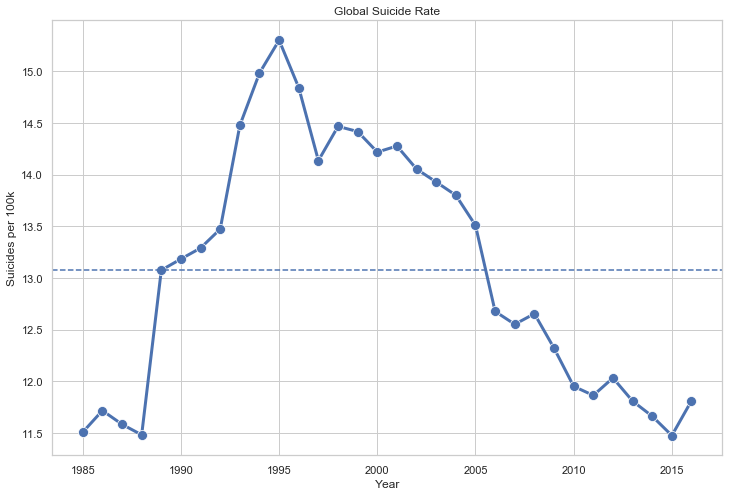

In [7]:
plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
sns.lineplot(x=data_gb_year_sum.index,
             y=data_gb_year_sum['suicides/100k pop'],
            marker='o',
            linewidth=3,
            markersize=10)
plt.axhline(data_gb_year_sum['suicides/100k pop'].mean(),ls='--')
plt.title('Global Suicide Rate')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k')
plt.show()

##### Global Suicide Rates have actually been decreasing since their peak in 1995.  Not what I would have guessed

## Suicide by Gender

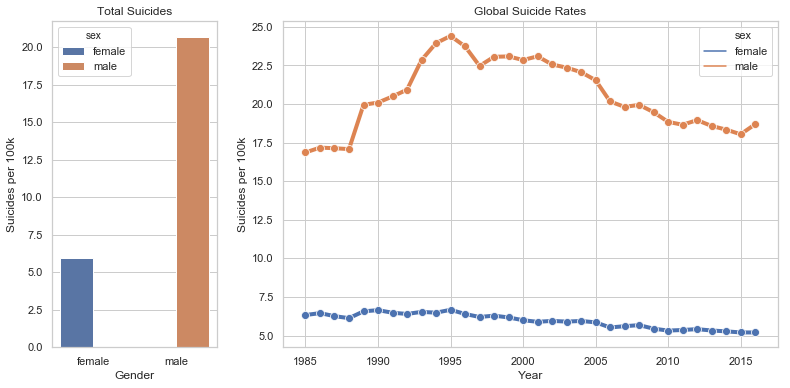

In [8]:
data_gb_sex_sum = data_raw.groupby(['sex']).sum()
data_gb_sex_sum['suicides/100k pop'] = data_gb_sex_sum['suicides_no']/data_gb_sex_sum['population'] * 100000
# print(data_gb_sex_sum)
data_gb_year_sex_sum= data_raw.groupby(['year','sex']).sum()
data_gb_year_sex_sum['suicides/100k pop'] = data_gb_year_sex_sum['suicides_no']/data_gb_year_sex_sum['population'] * 100000

# print(data_gb_year_sex_sum)


fig, axes = plt.subplots(1,2,figsize=(13,6))
gs = GridSpec(1,2,width_ratios=[1,3])

axes[0] = plt.subplot(gs[0])
sns.barplot(x = data_gb_sex_sum.index,
            y=data_gb_sex_sum['suicides/100k pop'],
            hue=data_gb_sex_sum.index,
           ax=axes[0])
plt.title('Total Suicides')
plt.xlabel('Gender')
plt.ylabel('Suicides per 100k')

axes[1] = plt.subplot(gs[1])
sns.lineplot(x=data_gb_year_sex_sum.index.get_level_values('year'),
            y=data_gb_year_sex_sum['suicides/100k pop'],
            hue=data_gb_year_sex_sum.index.get_level_values('sex'),
            ax=axes[1],
            marker='o',
            linewidth=4,
            markersize=8)
plt.title('Global Suicide Rates')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k')
plt.show()




#### Most suicides are from males, and all of the global suicide rate fluctuations are in the male population.  The female suicide rate is roughly constant

## Suicides By Country

In [9]:
data_gb_country_sum = data_raw.groupby('country').sum()
data_gb_country_sum['suicides/100k pop'] = data_gb_country_sum['suicides_no']/data_gb_country_sum['population'] * 100000
data_gb_country_sum.sort_values(by='suicides/100k pop',inplace=True, ascending=False)

usa_df = data_gb_country_sum.loc[data_gb_country_sum.index == 'United States']
usa_df['suicides/100k pop'] = usa_df['suicides_no']/usa_df['population'] * 100000


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


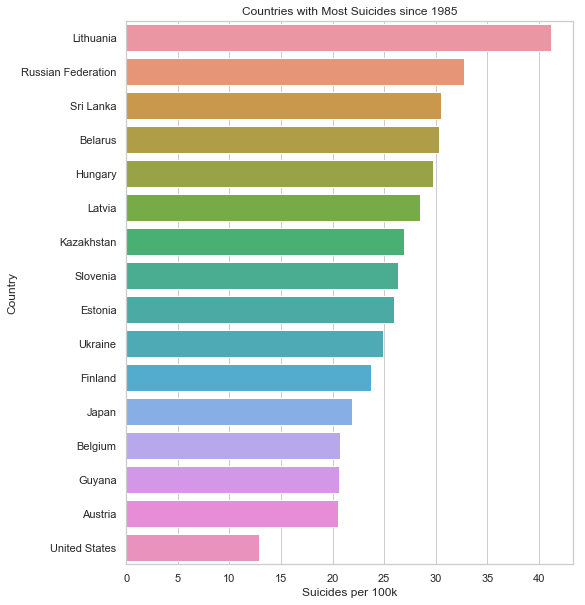

In [10]:
#plotting top 10 countries by suicide rate with respect to US
data_top_suicides = pd.concat([data_gb_country_sum[:15],usa_df])

plt.figure(figsize=(8,10))
sns.barplot(x = data_top_suicides['suicides/100k pop'],
            y = data_top_suicides.index)
plt.title("Countries with Most Suicides since 1985")
plt.xlabel("Suicides per 100k")
plt.ylabel("Country")
plt.show()

#### Eastern European countries seem to have high suicide rates

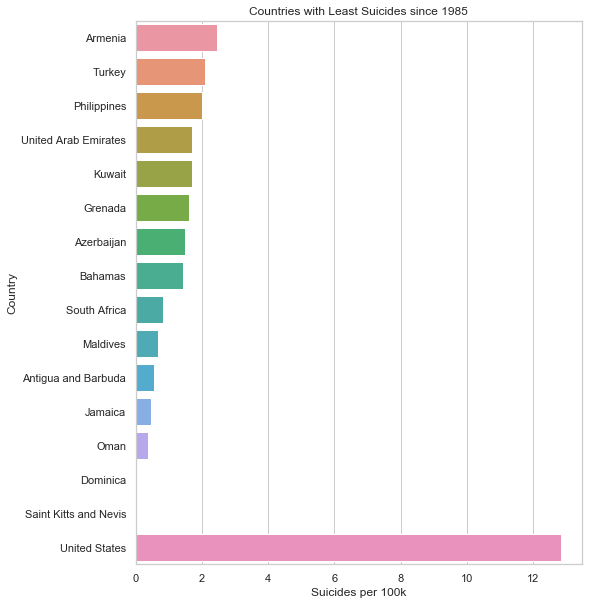

In [11]:
#plotting bottom countries by suicide rate
data_bot_suicides = pd.concat([data_gb_country_sum[-15:],usa_df])
plt.figure(figsize=(8,10))
sns.barplot(x = data_bot_suicides['suicides/100k pop'],
            y = data_bot_suicides.index)
plt.title("Countries with Least Suicides since 1985")
plt.xlabel("Suicides per 100k")
plt.ylabel("Country")
plt.show()

In [12]:
#Plotting suicides over time for above countries

data_gb_year_country_sum = data_raw.groupby(['year','country']).sum()
data_gb_year_country_sum['suicides/100k pop'] = data_gb_year_country_sum['suicides_no']/data_gb_year_country_sum['population'] * 100000
data_gb_year_country_sum.sort_values(by='suicides/100k pop',inplace=True, ascending=False)

top_year_countries = data_gb_year_country_sum.loc[
    data_gb_year_country_sum.index.get_level_values('country').isin(data_top_suicides.index)]

bot_year_countries = data_gb_year_country_sum.loc[
    data_gb_year_country_sum.index.get_level_values('country').isin(data_bot_suicides.index)]

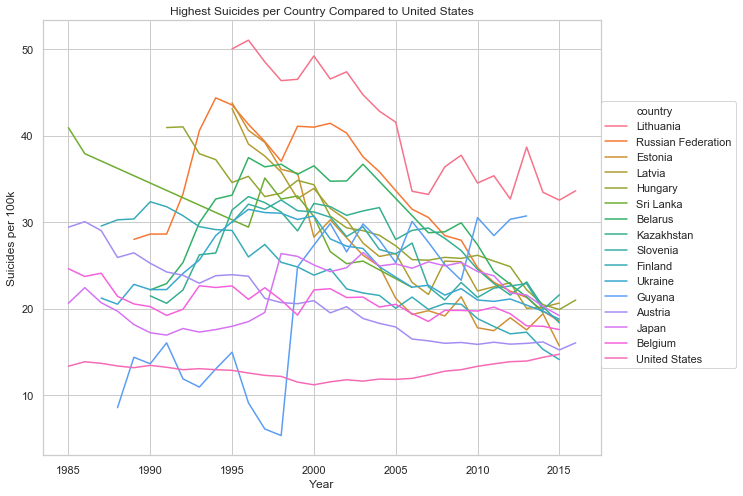

In [17]:
plt.figure(figsize=(10,8))
sns.lineplot(x=top_year_countries.index.get_level_values('year'),
             y=top_year_countries['suicides/100k pop'],
             hue=top_year_countries.index.get_level_values('country'))
plt.title("Highest Suicides per Country Compared to United States")
plt.legend(loc=(1,.2))
plt.xlabel("Year")
plt.ylabel("Suicides per 100k")
plt.show()

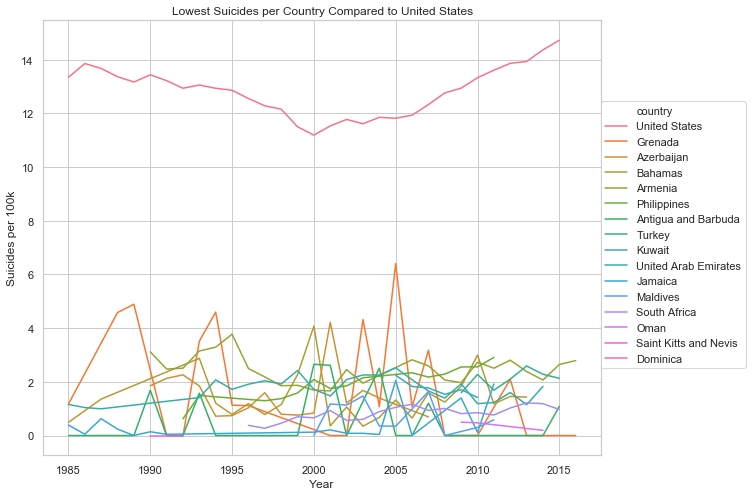

In [18]:
plt.figure(figsize=(10,8))
sns.lineplot(x=bot_year_countries.index.get_level_values('year'),
             y=bot_year_countries['suicides/100k pop'],
             hue=bot_year_countries.index.get_level_values('country'))
plt.title("Lowest Suicides per Country Compared to United States")
plt.legend(loc=(1,.2))
plt.xlabel("Year")
plt.ylabel("Suicides per 100k")
plt.show()

#### Global suicide fluctuation can be mostly attributed to the Eastern European countries with an increase of suicides following the collapse of the Soviet Union in the early 1990's.  Suicide rates in the United States are roughly constant with a slight trend upwards since the year 2000.

## Suicides by Age Group

In [27]:
data_gb_age_sum = data_raw.groupby('age').sum()
data_gb_age_sum['suicides/100k pop'] = data_gb_age_sum['suicides_no']/data_gb_age_sum['population'] * 100000
data_gb_age_sum.sort_values(by='suicides/100k pop', inplace=True, ascending=False)

data_gb_year_age_sum = data_raw.groupby(['year','age']).sum()
data_gb_year_age_sum['suicides/100k pop'] = data_gb_year_age_sum['suicides_no']/data_gb_year_age_sum['population'] * 100000

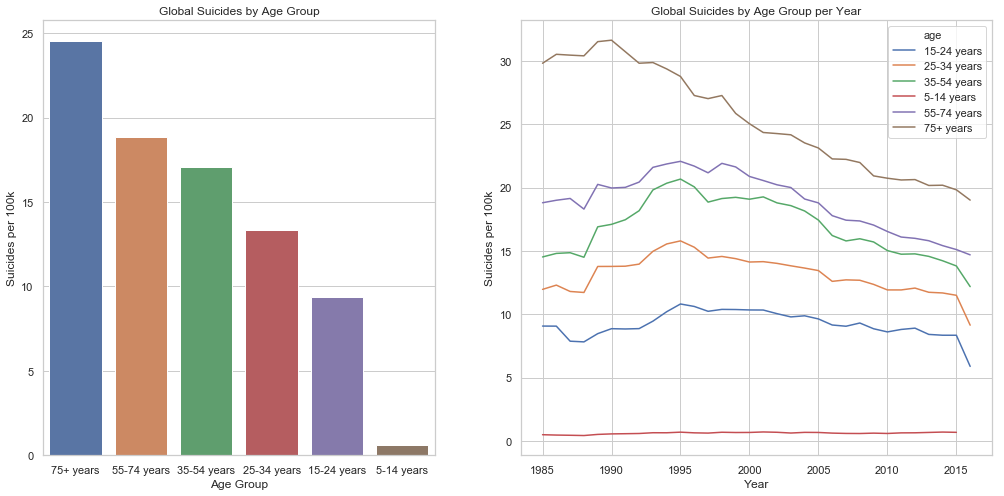

In [69]:
f, axes = plt.subplots(1,2,figsize=(17,8))
gs = GridSpec(1,2,width_ratios=[1,1.2])

axes[0] = plt.subplot(gs[0,0])
sns.barplot(x=data_gb_age_sum.index,
            y=data_gb_age_sum['suicides/100k pop'],
           ax = axes[0])
plt.title('Global Suicides by Age Group')
plt.ylabel('Suicides per 100k')
plt.xlabel('Age Group')

axes[1] = plt.subplot(gs[0,1])
sns.lineplot(x=data_gb_year_age_sum.index.get_level_values('year'),
            y=data_gb_year_age_sum['suicides/100k pop'],
            hue=data_gb_year_age_sum.index.get_level_values('age'),
             ax=axes[1])
plt.title('Global Suicides by Age Group per Year')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k')
plt.show()

#### Worldwide, the older an individual, the more likely they are to commit suicide.  Interesting! Let's see if we see the same trend in the USA.

In [71]:
usa_df = data_raw[data_raw.country == 'United States']

usa_gb_age_sum = usa_df.groupby('age').sum()
usa_gb_age_sum['suicides/100k pop'] = usa_gb_age_sum['suicides_no']/usa_gb_age_sum['population']
usa_gb_age_sum.sort_values(by='suicides/100k pop',inplace=True,ascending=False)

usa_gb_year_age_sum = usa_df.groupby(['year','age']).sum()
usa_gb_year_age_sum['suicides/100k pop'] = usa_gb_year_age_sum['suicides_no']/usa_gb_year_age_sum['population']

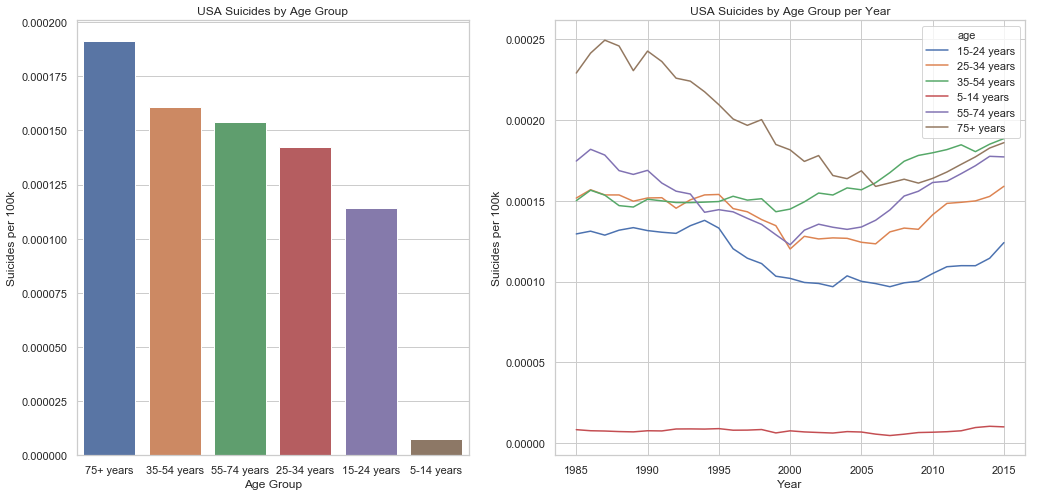

In [72]:
f, axes = plt.subplots(1,2,figsize=(17,8))
gs = GridSpec(1,2,width_ratios=[1,1.2])

axes[0] = plt.subplot(gs[0,0])
sns.barplot(x=usa_gb_age_sum.index,
            y=usa_gb_age_sum['suicides/100k pop'],
            ax = axes[0])
plt.title('USA Suicides by Age Group')
plt.ylabel('Suicides per 100k')
plt.xlabel('Age Group')

axes[1] = plt.subplot(gs[0,1])
sns.lineplot(x=usa_gb_year_age_sum.index.get_level_values('year'),
            y=usa_gb_year_age_sum['suicides/100k pop'],
            hue=usa_gb_year_age_sum.index.get_level_values('age'),
            ax=axes[1])
plt.title('USA Suicides by Age Group per Year')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k')
plt.show()

#### Not the same trend in the US as globally -- 55-74 year olds switched places with the 35-54 year old age group.  However, a majority of suicides still come from the oldest age group.  Not what I would have guessed!

#### In the last 10 or so years though, the 35-54 year olds have actually surpassed the oldest generation in the US for highest suicide rate